# MNIST
https://pytorch.apachecn.org/2.0/tutorials/beginner/basics/quickstart_tutorial/

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
PATH ="D:/BaiduNetdiskDownload/data/" 
# 从开源数据集下载训练数据。
training_data = datasets.FashionMNIST(
    root=PATH,
    train=True,
    download=True,
    transform=ToTensor(),
)

# 从开源数据集下载测试数据。
test_data = datasets.FashionMNIST(
    root=PATH,
    train=False,
    download=True,
    transform=ToTensor(),
)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting D:/BaiduNetdiskDownload/data/FashionMNIST\raw\train-images-idx3-ubyte.gz to D:/BaiduNetdiskDownload/data/FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting D:/BaiduNetdiskDownload/data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to D:/BaiduNetdiskDownload/data/FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting D:/BaiduNetdiskDownload/data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to D:/BaiduNetdiskDownload/data/FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting D:/BaiduNetdiskDownload/data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to D:/BaiduNetdiskDownload/data/FashionMNIST\raw



In [8]:
batch_size = 64

# 创建数据加载器
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


# 创建模型

In [10]:
# 获取 cpu, gpu 或 mps 设备用于加速训练.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# 定义神经网络
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)


Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [13]:
learning_rate = 1e-3
batch_size = 64

epochs = 1000
# 初始货损失函数
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X ,y= X.to(device) , y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")







loss: 2.296980  [   64/60000]
loss: 2.291571  [ 6464/60000]
loss: 2.275328  [12864/60000]
loss: 2.276410  [19264/60000]
loss: 2.261128  [25664/60000]
loss: 2.220249  [32064/60000]
loss: 2.233139  [38464/60000]
loss: 2.193886  [44864/60000]
loss: 2.191471  [51264/60000]
loss: 2.168432  [57664/60000]


In [16]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X ,y= X.to(device) , y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")





Test Error: 
 Accuracy: 46.8%, Avg loss: 2.164679 



In [19]:
for i  in range(100):
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)

loss: 1.586293  [   64/60000]
loss: 1.565427  [ 6464/60000]
loss: 1.412769  [12864/60000]
loss: 1.487185  [19264/60000]
loss: 1.366200  [25664/60000]
loss: 1.352283  [32064/60000]
loss: 1.372206  [38464/60000]
loss: 1.288762  [44864/60000]
loss: 1.326199  [51264/60000]
loss: 1.235947  [57664/60000]
Test Error: 
 Accuracy: 63.8%, Avg loss: 1.257612 

loss: 1.326824  [   64/60000]
loss: 1.320754  [ 6464/60000]
loss: 1.153214  [12864/60000]
loss: 1.257654  [19264/60000]
loss: 1.133776  [25664/60000]
loss: 1.154431  [32064/60000]
loss: 1.180662  [38464/60000]
loss: 1.109480  [44864/60000]
loss: 1.149148  [51264/60000]
loss: 1.077721  [57664/60000]
Test Error: 
 Accuracy: 65.0%, Avg loss: 1.091346 

loss: 1.155887  [   64/60000]
loss: 1.169285  [ 6464/60000]
loss: 0.986477  [12864/60000]
loss: 1.116031  [19264/60000]
loss: 0.993333  [25664/60000]
loss: 1.022848  [32064/60000]
loss: 1.062051  [38464/60000]
loss: 0.995915  [44864/60000]
loss: 1.034840  [51264/60000]
loss: 0.977532  [57664/600

In [24]:
file = './MINST/model_weights.pth'
#model = model.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), file)

model = torch.load(file)

Ankle Boot  T-shirt/top  T-shirt/top  Dress


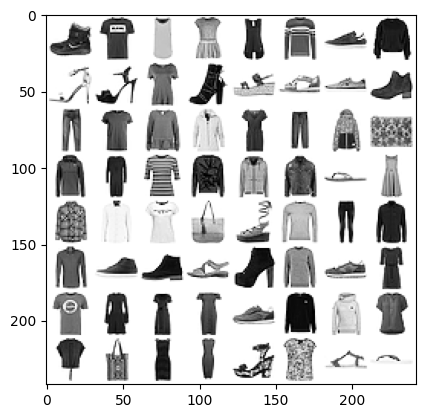

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

print('  '.join(classes[labels[j]] for j in range(4)))

In [6]:
from torchsummary import summary

indata= (28,28)
summary(model , indata)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 512]         262,656
              ReLU-5                  [-1, 512]               0
            Linear-6                   [-1, 10]           5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.55
Estimated Total Size (MB): 2.58
----------------------------------------------------------------
